In [1]:

# Download Data from Yahoo Finance
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Pour lire les données de Yahoo Finance, vous devez installer le toolbox yfinance
import yfinance as yf 

def get_dow():
    start_sp = dt.datetime(2004,12,31)
    end_sp = dt.datetime(2019, 12,31)

    # Dow Jones index
    # 1st Dow Jones Index + 30 components
    dow30 = ['^DJI','AXP', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'DD', 'XOM',
            'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM',
            'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG',
            'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WMT', 'DIS']

    dow_data = yf.download(dow30, start=start_sp, end=end_sp,group_by="ticker")

    return dow_data.transpose()

In [2]:
#TODO: ne pas ignorer tout les erreurs
def calculate_fivedays_roi(stock_price, date):
    roi = None
    try:
        past_date = date - np.timedelta64(5, "D")
        current_value = stock_price.loc[date]
        past_value = stock_price.loc[past_date]
        roi = (current_value - past_value)/past_value * 100        
    except KeyError:
        pass        
    return roi

# Calculate roi over a period of time
def get_rois(stock_prices, ticker, start_date, end_date):
    rois = []
    dates = []
    company_stock_price = stock_prices.loc[(ticker, "Close")]

    # calculate de ROI over the last 250 days
    curr_date = start_date
    while(curr_date < end_date):
        roi = calculate_fivedays_roi(company_stock_price, curr_date)
        if roi:
            rois.append(roi)
            dates.append(curr_date)
        curr_date = curr_date + np.timedelta64(1, "D")                

    return pd.Series(rois,index=dates)

# Calculate roi for a bunch of campanies
def get_companies_rois(stock_prices, start_date, end_date):
    tickers = stock_prices.index.get_level_values(0).unique().array
            
    result = pd.DataFrame()
    for ticker in tickers:             
        result[ticker] = get_rois(stock_prices, ticker, start_date, end_date)
    
    return result
    
def calculate_mean_roi(rois):
    rois["Mean"] = rois.mean(axis=1)
    return rois

In [21]:
def historic_var_comparison(rois):
    five_percent = int(250 * 0.05)
    return rois.nsmallest(five_percent)[five_percent-1]

def calculate_parametric_var(rois):
    mu = np.mean(rois)
    std = np.std(rois)
    return mu - 1.96 * std

def calculate_var(stock_prices, comparison_func):
    period = 250    
    # [min date + 5, higher date] (we need 5 days buffer to calculate roi)
    start_date = dow_prices.columns.array.min() + np.timedelta64( 5, "D")
    end_date = dow_prices.columns.array.max()
    rois = get_companies_rois(stock_prices, start_date, end_date)
    rois = calculate_mean_roi(rois)
    
    var_array = []
    dates = []
    curr_date = start_date + np.timedelta64( 250, "D")
    while(curr_date < end_date):
        period_end = curr_date
        period_begin = period_end - np.timedelta64(period, "D")
        var = comparison_func(rois.loc[period_begin:period_end]["Mean"])
        var_array.append(var)
        dates.append(curr_date)
        curr_date = curr_date + np.timedelta64(1, "D")
    return pd.Series(var_array, index=dates).apply(lambda x : abs(x))

def plot_var(var_values):
    plt.plot(var_values.index, var_values )
    plt.xlabel('VaR')
    plt.ylabel('Time')
    plt.title('Historic VaR over time')
    plt.show()

[*********************100%***********************]  31 of 31 completed
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo

allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo


allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo


allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo


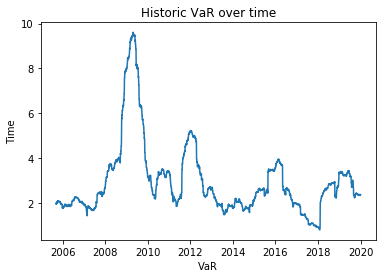

In [22]:
dow_prices = get_dow()
var_array = calculate_var(dow_prices, calculate_parametric_var)
plot_var(var_array)